# Importing Libraries


In [16]:
import sys
import re
import string
import json
import os
import ast

In [17]:
import datetime
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import csv
import tweepy
import math

In [18]:
import nltk
nltk.download('vader_lexicon')
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('punkt')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer

from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import unicodedata
sentiment_i_a = SentimentIntensityAnalyzer()

from nltk.corpus import subjectivity
from nltk.sentiment import SentimentAnalyzer
from nltk.sentiment.util import *

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


/usr/local/lib/python3.7/dist-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


In [19]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

from sklearn import svm
from sklearn.svm import SVR 

from sklearn.metrics import mean_squared_error
from math import sqrt

# Loading Dataset


In [85]:
tweets = pd.read_csv("/content/drive/MyDrive/Twitter project /tweets.csv")

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [86]:
tweets.head()

,Date,created_at,id,text
0,2022-05-19,2022-05-19T23:59:56.000Z,1.527440e+18,The Elon musk story is so obviously true it’s ...
1,2022-05-19,2022-05-19T23:59:53.000Z,1.527440e+18,RT @garyblack00: Many are confusing operating ...
2,2022-05-19,2022-05-19T23:59:47.000Z,1.527440e+18,what happens to $tsla if Elon is forced to ste...
3,2022-05-19,2022-05-19T23:59:43.000Z,1.527440e+18,@pablo_cro @Benzinga @VoltInuOfficial ⚡️$VOLT ...
4,2022-05-19,2022-05-19T23:59:37.000Z,1.527440e+18,@_litwin @stevenmarkryan Hmmm… last time I che...


In [21]:
tweets.shape

(84190, 3)

In [22]:
tweets.columns

Index(['created_at', 'id', 'text'], dtype='object')

In [11]:
tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84190 entries, 0 to 84189
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   created_at  84190 non-null  object 
 1   id          84112 non-null  float64
 2   text        84112 non-null  object 
dtypes: float64(1), object(2)
memory usage: 1.9+ MB


In [88]:
tweets.drop_duplicates('text', keep='first', inplace=True)

In [89]:
tweets.drop('created_at',axis=1,inplace=True)

In [90]:
tweets.shape

(37128, 3)

In [95]:
tweets['text']=tweets['text'].apply(str)

# Text cleaning


In [96]:
def clean_tweet_text(text):
    text = re.sub(r'@', '', text)
    text = re.sub(r'#', '', text)
    text = re.sub(r'RT[\s]+', '', text)
    text = re.sub(r'https?:\/\/\S+', '', text)
    text=  re.sub(r'[^a-zA-Z " "]', '', text)
    text = text.lower()
    return text

# the following line makes use of an apply function-- it will call clean_tweet_text on every element in the 'text' column
txt=tweets['text'].transform(clean_tweet_text)

In [97]:
txt.head()

0    the elon musk story is so obviously true its h...
1    garyblack many are confusing operating decisio...
2    what happens to tsla if elon is forced to step...
3    pablocro benzinga voltinuofficial volt volt vo...
4    litwin stevenmarkryan hmmm last time i checked...
Name: text, dtype: object

In [98]:
tweets['text']=txt

In [99]:
import nltk
nltk.download('punkt')
from textblob import TextBlob

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [100]:
tweets['Polarity'] = tweets['text'].apply(lambda x: TextBlob(x).sentiment.polarity)
tweets['Subjectivity'] = tweets['text'].apply(lambda x: TextBlob(x).sentiment.subjectivity)
tweets.head()

,Date,id,text,Polarity,Subjectivity
0,2022-05-19,1.527440e+18,the elon musk story is so obviously true its h...,0.483333,0.883333
1,2022-05-19,1.527440e+18,garyblack many are confusing operating decisio...,0.100000,0.450000
2,2022-05-19,1.527440e+18,what happens to tsla if elon is forced to step...,-0.227778,0.244444
3,2022-05-19,1.527440e+18,pablocro benzinga voltinuofficial volt volt vo...,0.000000,0.000000
4,2022-05-19,1.527440e+18,litwin stevenmarkryan hmmm last time i checked...,0.100000,0.183333


# Labeling data

In [101]:
#inspect the most negatively charged tweets
tweets.sort_values(by='Polarity', ascending=True)[['text', 'Polarity', 'Subjectivity']].reset_index(drop=True).head(n=10)

,text,Polarity,Subjectivity
0,squawksquare the worst selfinflict damage elon...,-1.0,1.0
1,montanaskeptic tsla russmitchell bcontreras in...,-1.0,1.0
2,garyblack while elon has run tsla spacex and b...,-1.0,1.0
3,why auto manufaturing companies are terrible b...,-1.0,1.0
4,elonmusk calls esg an outrageous scam after ts...,-1.0,1.0
5,this is truly insane tsla,-1.0,1.0
6,thats actually insane tsla,-1.0,1.0
7,its insane to see tsla lost over in one day,-1.0,1.0
8,tslaretirearly shanevenem tradershon joecarlso...,-1.0,1.0
9,sensanders its devastating that the us governm...,-1.0,1.0


In [102]:
criteria = [tweets['Polarity'].between(-1, -0.65),tweets['Polarity'].between(-0.65,-0.01),tweets['Polarity'].between(-0.01,0.01), tweets['Polarity'].between(0.01, 0.5), tweets['Polarity'].between(0.5, 1.0)]
values = ['Fairly Negative','Negative', 'neutral','Positive', 'Fairly Positive']
tweets['sentiment'] = np.select(criteria, values, 0)
#labeled data
tweets.to_csv("/content/drive/MyDrive/Twitter project /Labeled data.csv", encoding = 'utf-8', header= True)

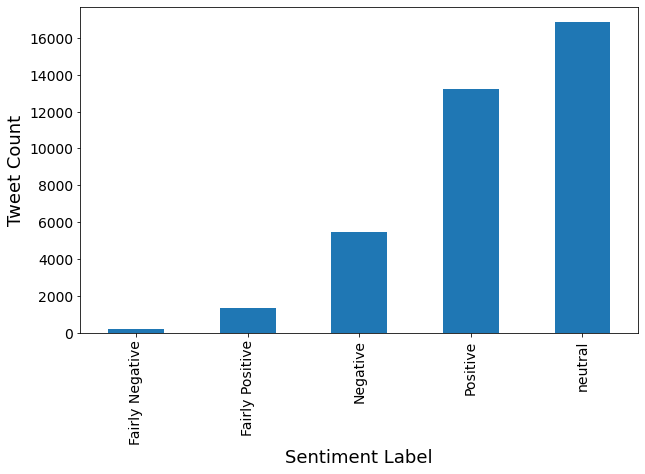

<Figure size 432x288 with 0 Axes>

In [103]:
fig = plt.figure(figsize=(10, 6))
tweets['sentiment'].value_counts().sort_index().plot.bar()
plt.xlabel('Sentiment Label', fontsize=18)
plt.ylabel('Tweet Count', fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()
plt.tight_layout()
fig.savefig("/content/drive/MyDrive/Twitter project /sentiment_value_counts.png", bbox_inches='tight');

In [104]:
tweets['sentiment'].value_counts()

neutral            16841
Positive           13241
Negative            5493
Fairly Positive     1335
Fairly Negative      218
Name: sentiment, dtype: int64

In [40]:
tweets.isnull().any()

created_at      False
id               True
text            False
Polarity        False
Subjectivity    False
sentiment       False
dtype: bool

# Tokenization

**Unique words**

Text(0.5, 1.0, 'Most Frequently Occuring Words - Top 30')

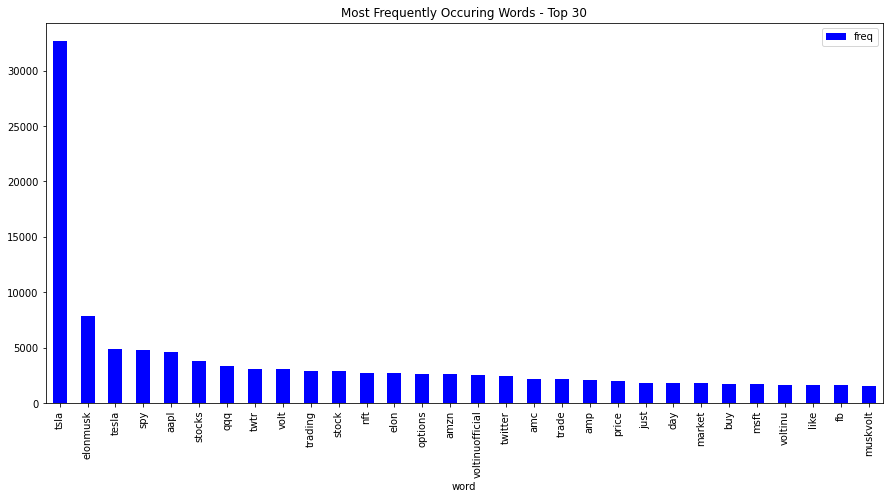

In [41]:
from sklearn.feature_extraction.text import CountVectorizer


cv = CountVectorizer(stop_words = 'english')
words = cv.fit_transform(tweets.text)

sum_words = words.sum(axis=0)

words_freq = [(word, sum_words[0, i]) for word, i in cv.vocabulary_.items()]
words_freq = sorted(words_freq, key = lambda x: x[1], reverse = True)

frequency = pd.DataFrame(words_freq, columns=['word', 'freq'])

frequency.head(30).plot(x='word', y='freq', kind='bar', figsize=(15, 7), color = 'blue')
plt.title("Most Frequently Occuring Words - Top 30")

In [42]:
tokenized_tweet = tweets['text'].apply(lambda x: x.split()) 
print(len(tokenized_tweet))

37128


# Word 2 vec

In [43]:
tokenized_tweet=list(tokenized_tweet)
temps=[i for i,val in enumerate(tokenized_tweet) if val==[]]
print(temps)
X=[]
y=[]
s=list(tweets['sentiment'])
for i in range(0,len(tokenized_tweet)):
  if i in temps:
    continue
  else:
    X.append(tokenized_tweet[i])
    y.append(s[i])
print(len(X),len(y))

[999, 2372, 6396, 11859, 14554, 16349, 17708, 22059, 28694, 29643, 31817, 36549]
37116 37116


In [44]:
vocab=[]
for tweet in X:
  for w in tweet:
    vocab.append(w)
vocab=list(set(vocab))

In [ ]:
vocab

In [45]:
# importing gensim
import gensim

# creating a word to vector model
model_w2v = gensim.models.Word2Vec(
            X,
            size=200, # desired no. of features/independent variables 
            window=5, # context window size
            min_count=2,
            sg = 1, # 1 for skip-gram model
            hs = 0,
            negative = 10, # for negative sampling
            workers= 2, # no.of cores
            seed = 34)
#

In [46]:
model_w2v.train(X, total_examples= len(X), epochs=20)

(12946415, 15868400)

In [ ]:
model_w2v.wv.vocab

In [ ]:
w2vec_sent_X=[]
w2vec_sent_y=[]
for tweet in X:
  temp=[]
  for word in tweet:
    if word in model_w2v.wv.vocab:
      a=np.array(model_w2v[word])
      temp.append(a)
  if temp!=[]:
    temp=np.array(temp)
    temp=np.mean(temp,axis=0)
    print(temp.shape)
    w2vec_sent_X.append(temp)
    ind=X.index(tweet)
    w2vec_sent_y.append(y[ind])

In [49]:
w2vec_sent_X=np.array(w2vec_sent_X)
print(w2vec_sent_X.shape)

w2vec_sent_y=np.array(w2vec_sent_y)
print(w2vec_sent_y.shape)

(37023, 200)
(37023,)


# ML models

In [127]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(w2vec_sent_X, w2vec_sent_y, test_size=0.2, random_state=42)

In [164]:
from sklearn.preprocessing import LabelBinarizer
y = LabelBinarizer().fit_transform(w2vec_sent_y)

# Multilayer Perceptron

In [165]:
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_classification

In [166]:
model = MLPClassifier(random_state=1, max_iter=200).fit(X_train, y_train)
model.predict_proba(X_test)
model.predict(X_test)
model.score(X_test, y_test)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


0.7665091154625253

# SVM

In [167]:
from sklearn.svm import SVC
from sklearn import svm
model=SVC(kernel = 'rbf',gamma='auto', C = 1,probability=True)

In [168]:
model.fit(X_train,y_train)

SVC(C=1, gamma='auto', probability=True)

In [170]:
model.score(X_test,y_test)

0.6706279540850777

# KNN

In [171]:
from sklearn.multiclass import OutputCodeClassifier
from sklearn.neighbors import KNeighborsClassifier

In [172]:
KNN = KNeighborsClassifier(n_neighbors=5)

In [173]:
KNN.fit(X_train,y_train)

KNeighborsClassifier()

In [174]:
KNN.score(X_test,y_test)

0.662660364618501

# Naive Bayes

In [175]:
from sklearn.naive_bayes import GaussianNB

In [177]:
gnb = GaussianNB()
gnb.fit(X_train,y_train)
gnb.predict(X_test)
gnb.score(X_test,y_test)

0.4424037812288994

In [ ]:
!pip install yfinance

# Fetching stock movements






In [112]:
import yfinance as yf

# Set the start and end date
start_date = '2022-05-14'
end_date = '2022-05-20'

# Set the ticker
ticker = 'TSLA'

# Get the data
data = yf.download(ticker, start_date, end_date)

# Print 4 rows
data.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-05-16,767.159973,769.76001,719.090027,724.369995,724.369995,28699500
2022-05-17,747.359985,764.47998,728.849976,761.609985,761.609985,26745400
2022-05-18,744.520020,760.50000,700.809998,709.809998,709.809998,29270600
2022-05-19,707.000000,734.00000,694.109985,709.419983,709.419983,30098900


In [14]:
data.dtypes

Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object

## Correlation Section


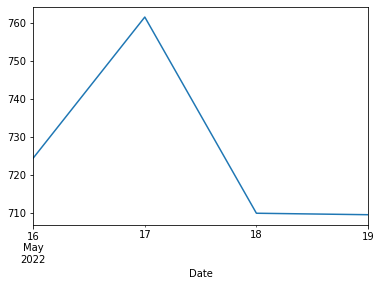

In [7]:
data['Close'].plot()

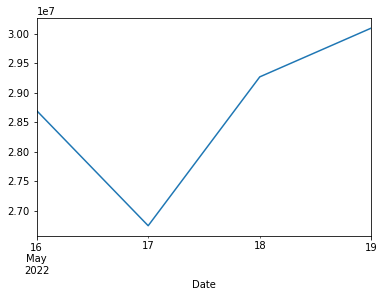

In [8]:
data['Volume'].plot()

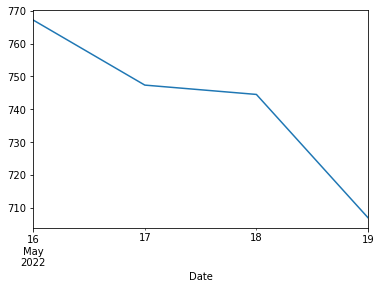

In [9]:
data['Open'].plot()

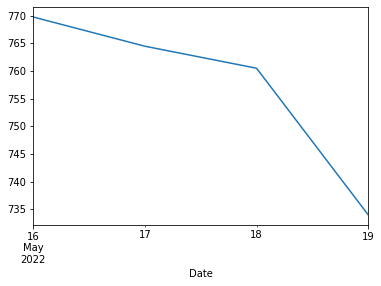

In [10]:
data['High'].plot()

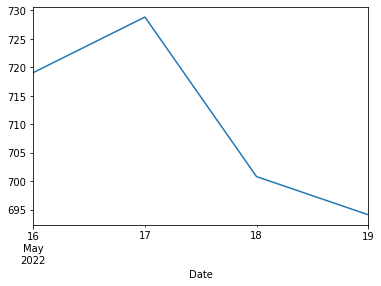

In [12]:
data['Low'].plot()

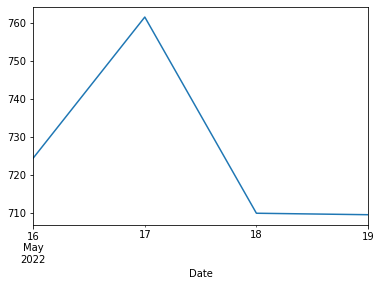

In [13]:
data['Adj Close'].plot()

In [113]:
df=data.to_csv('/content/drive/MyDrive/Twitter project /stock_movements.csv')

In [117]:
tweets["Date"] = pd.to_datetime(tweets["Date"])

## Merging tweets and stock movement datasets

In [118]:
#Merge the data set on the date field
merge = tweets.merge(data, how='inner', on='Date')
#Show the merged data set
merge.head()

,Date,id,text,Polarity,Subjectivity,sentiment,Open,High,Low,Close,Adj Close,Volume
0,2022-05-19,1.527440e+18,the elon musk story is so obviously true its h...,0.483333,0.883333,Positive,707.0,734.0,694.109985,709.419983,709.419983,30098900
1,2022-05-19,1.527440e+18,garyblack many are confusing operating decisio...,0.100000,0.450000,Positive,707.0,734.0,694.109985,709.419983,709.419983,30098900
2,2022-05-19,1.527440e+18,what happens to tsla if elon is forced to step...,-0.227778,0.244444,Negative,707.0,734.0,694.109985,709.419983,709.419983,30098900
3,2022-05-19,1.527440e+18,pablocro benzinga voltinuofficial volt volt vo...,0.000000,0.000000,neutral,707.0,734.0,694.109985,709.419983,709.419983,30098900
4,2022-05-19,1.527440e+18,litwin stevenmarkryan hmmm last time i checked...,0.100000,0.183333,Positive,707.0,734.0,694.109985,709.419983,709.419983,30098900


In [119]:
merge.shape

(29861, 12)

In [120]:
merge.dropna()

,Date,id,text,Polarity,Subjectivity,sentiment,Open,High,Low,Close,Adj Close,Volume
0,2022-05-19,1.527440e+18,the elon musk story is so obviously true its h...,0.483333,0.883333,Positive,707.000000,734.00000,694.109985,709.419983,709.419983,30098900
1,2022-05-19,1.527440e+18,garyblack many are confusing operating decisio...,0.100000,0.450000,Positive,707.000000,734.00000,694.109985,709.419983,709.419983,30098900
2,2022-05-19,1.527440e+18,what happens to tsla if elon is forced to step...,-0.227778,0.244444,Negative,707.000000,734.00000,694.109985,709.419983,709.419983,30098900
3,2022-05-19,1.527440e+18,pablocro benzinga voltinuofficial volt volt vo...,0.000000,0.000000,neutral,707.000000,734.00000,694.109985,709.419983,709.419983,30098900
4,2022-05-19,1.527440e+18,litwin stevenmarkryan hmmm last time i checked...,0.100000,0.183333,Positive,707.000000,734.00000,694.109985,709.419983,709.419983,30098900
...,...,...,...,...,...,...,...,...,...,...,...,...
29856,2022-05-16,1.525990e+18,jfhksar maybenow do tsla,0.000000,0.000000,neutral,767.159973,769.76001,719.090027,724.369995,724.369995,28699500
29857,2022-05-16,1.525990e+18,trending stocks on fintwit source spy qqq ...,0.250000,0.375000,Positive,767.159973,769.76001,719.090027,724.369995,724.369995,28699500
29858,2022-05-16,1.525990e+18,twoday riskfree trial to sign up visit login ...,-0.025000,0.750000,Negative,767.159973,769.76001,719.090027,724.369995,724.369995,28699500
29859,2022-05-16,1.525990e+18,kaitduffy expiration strike ideasspy cp c c ...,0.000000,0.000000,neutral,767.159973,769.76001,719.090027,724.369995,724.369995,28699500


In [121]:
merge.isnull().any()

Date            False
id              False
text            False
Polarity        False
Subjectivity    False
sentiment       False
Open            False
High            False
Low             False
Close           False
Adj Close       False
Volume          False
dtype: bool

In [122]:
merge.dtypes

Date            datetime64[ns]
id                     float64
text                    object
Polarity               float64
Subjectivity           float64
sentiment               object
Open                   float64
High                   float64
Low                    float64
Close                  float64
Adj Close              float64
Volume                   int64
dtype: object

In [149]:
merge.to_csv('/content/drive/MyDrive/Twitter project /merge.csv', index=False)

In [123]:
#Create the feature data set
X = merge
X = np.array(X.drop(['sentiment'],1))
#Create the target data set
y = np.array(merge['sentiment'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  This is separate from the ipykernel package so we can avoid doing imports until


In [124]:
print(X.shape,y.shape)

(29861, 11) (29861,)


In [125]:
#Split the data into 80% training and 20% testing data sets
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 0)

In [128]:
from sklearn.preprocessing import LabelBinarizer
y = LabelBinarizer().fit_transform(y)

In [152]:
mergeed_df=pd.read_csv('/content/drive/MyDrive/Twitter project /merge.csv')
mergeed_df

,Date,id,text,Polarity,Subjectivity,sentiment,Open,High,Low,Close,Adj Close,Volume
0,2022-05-19,1.527440e+18,the elon musk story is so obviously true its h...,0.483333,0.883333,Positive,707.000000,734.00000,694.109985,709.419983,709.419983,30098900
1,2022-05-19,1.527440e+18,garyblack many are confusing operating decisio...,0.100000,0.450000,Positive,707.000000,734.00000,694.109985,709.419983,709.419983,30098900
2,2022-05-19,1.527440e+18,what happens to tsla if elon is forced to step...,-0.227778,0.244444,Negative,707.000000,734.00000,694.109985,709.419983,709.419983,30098900
3,2022-05-19,1.527440e+18,pablocro benzinga voltinuofficial volt volt vo...,0.000000,0.000000,neutral,707.000000,734.00000,694.109985,709.419983,709.419983,30098900
4,2022-05-19,1.527440e+18,litwin stevenmarkryan hmmm last time i checked...,0.100000,0.183333,Positive,707.000000,734.00000,694.109985,709.419983,709.419983,30098900
...,...,...,...,...,...,...,...,...,...,...,...,...
29856,2022-05-16,1.525990e+18,jfhksar maybenow do tsla,0.000000,0.000000,neutral,767.159973,769.76001,719.090027,724.369995,724.369995,28699500
29857,2022-05-16,1.525990e+18,trending stocks on fintwit source spy qqq ...,0.250000,0.375000,Positive,767.159973,769.76001,719.090027,724.369995,724.369995,28699500
29858,2022-05-16,1.525990e+18,twoday riskfree trial to sign up visit login ...,-0.025000,0.750000,Negative,767.159973,769.76001,719.090027,724.369995,724.369995,28699500
29859,2022-05-16,1.525990e+18,kaitduffy expiration strike ideasspy cp c c ...,0.000000,0.000000,neutral,767.159973,769.76001,719.090027,724.369995,724.369995,28699500


In [158]:
df=mergeed_df[['Date',
               'Adj Close',
               'Volume',
               'Polarity',
               'sentiment']]
df

,Date,Adj Close,Volume,Polarity,sentiment
0,2022-05-19,709.419983,30098900,0.483333,Positive
1,2022-05-19,709.419983,30098900,0.100000,Positive
2,2022-05-19,709.419983,30098900,-0.227778,Negative
3,2022-05-19,709.419983,30098900,0.000000,neutral
4,2022-05-19,709.419983,30098900,0.100000,Positive
...,...,...,...,...,...
29856,2022-05-16,724.369995,28699500,0.000000,neutral
29857,2022-05-16,724.369995,28699500,0.250000,Positive
29858,2022-05-16,724.369995,28699500,-0.025000,Negative
29859,2022-05-16,724.369995,28699500,0.000000,neutral


In [159]:
df.set_index('Date',inplace=True)

In [160]:
df['sentiment'].value_counts()

neutral            13378
Positive           10661
Negative            4600
Fairly Positive     1036
Fairly Negative      186
Name: sentiment, dtype: int64

In [162]:
df['Price Differene']=df['Adj Close'].diff()
df.dropna(inplace=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [163]:
df

,Adj Close,Volume,Polarity,sentiment,Price Differene
Date,,,,,
2022-05-19,709.419983,30098900,0.100000,Positive,0.0
2022-05-19,709.419983,30098900,-0.227778,Negative,0.0
2022-05-19,709.419983,30098900,0.000000,neutral,0.0
2022-05-19,709.419983,30098900,0.100000,Positive,0.0
2022-05-19,709.419983,30098900,0.133333,Positive,0.0
...,...,...,...,...,...
2022-05-16,724.369995,28699500,0.000000,neutral,0.0
2022-05-16,724.369995,28699500,0.250000,Positive,0.0
2022-05-16,724.369995,28699500,-0.025000,Negative,0.0


In [164]:
RISE = 1
FALL = 0
df['stock trend']= np.where(
    df['Price Differene'] >0, RISE, FALL
)
df

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,Adj Close,Volume,Polarity,sentiment,Price Differene,stock trend
Date,,,,,,
2022-05-19,709.419983,30098900,0.100000,Positive,0.0,0
2022-05-19,709.419983,30098900,-0.227778,Negative,0.0,0
2022-05-19,709.419983,30098900,0.000000,neutral,0.0,0
2022-05-19,709.419983,30098900,0.100000,Positive,0.0,0
2022-05-19,709.419983,30098900,0.133333,Positive,0.0,0
...,...,...,...,...,...,...
2022-05-16,724.369995,28699500,0.000000,neutral,0.0,0
2022-05-16,724.369995,28699500,0.250000,Positive,0.0,0
2022-05-16,724.369995,28699500,-0.025000,Negative,0.0,0


In [165]:
new_df = df[['Adj Close',
             'Volume',
             'sentiment',
             'stock trend']]

In [166]:
new_df = pd.get_dummies(new_df, columns = ['sentiment'])

In [168]:
new_df

,Adj Close,Volume,stock trend,sentiment_Fairly Negative,sentiment_Fairly Positive,sentiment_Negative,sentiment_Positive,sentiment_neutral
Date,,,,,,,,
2022-05-19,709.419983,30098900,0,0,0,0,1,0
2022-05-19,709.419983,30098900,0,0,0,1,0,0
2022-05-19,709.419983,30098900,0,0,0,0,0,1
2022-05-19,709.419983,30098900,0,0,0,0,1,0
2022-05-19,709.419983,30098900,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...
2022-05-16,724.369995,28699500,0,0,0,0,0,1
2022-05-16,724.369995,28699500,0,0,0,0,1,0
2022-05-16,724.369995,28699500,0,0,0,1,0,0


In [170]:
X=new_df.copy()
X.drop('stock trend', axis = 1, inplace= True)

In [173]:
y = new_df['stock trend'].values.reshape(-1,1)
y[:10]

array([[0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0]])

In [175]:
SPLIT=int(0.8*len(X))
X_train = X[:SPLIT]
X_test = X[SPLIT:]

y_train = y[:SPLIT]
y_test = y[SPLIT:]

In [181]:
model = MLPClassifier(random_state=1, max_iter=200).fit(X_train, y_train)
model.predict_proba(X_test)
model.predict(X_test)
model.score(X_test, y_test)


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


1.0

In [182]:
KNN = KNeighborsClassifier(n_neighbors=2)

In [183]:
KNN.fit(X_train, y_train)

KNN.score(X_test,y_test)       

/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


1.0

In [190]:
model = MLPClassifier(random_state=1, max_iter=200).fit(X_train, y_train)
model.predict_proba(X_test)
model.predict(X_test)
model.score(X_test, y_test)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


1.0

In [186]:
predictions = model.predict(X_test)


In [189]:
predictions

array([0, 0, 0, ..., 0, 0, 0])